# Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [1]:
import numpy as np
from scipy.stats import t

# Sample data
data = np.random.normal(loc=50, scale=5, size=100)

# Calculate the mean and standard deviation of the sample
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

# Calculate the critical value for a 95% confidence interval
n = len(data)
df = n - 1
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)

# Calculate the margin of error
margin_of_error = t_critical * sample_std / np.sqrt(n)

# Calculate the lower and upper bounds of the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Print the results
print(f"Sample mean: {sample_mean:.2f}")
print(f"Margin of error: {margin_of_error:.2f}")
print(f"95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f})")


Sample mean: 49.36
Margin of error: 0.98
95% confidence interval: (48.39, 50.34)


# Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [2]:
import numpy as np
from scipy.stats import chisquare

# Observed frequencies
observed_freq = np.array([10, 22, 18, 13, 8, 29]) # blue, orange, green, yellow, red, brown

# Expected frequencies
expected_freq = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * np.sum(observed_freq)

# Perform the chi-square goodness of fit test
chi2, p_value = chisquare(observed_freq, expected_freq, ddof=5)

# Print the results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The distribution of colors of M&Ms in the bag does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The distribution of colors of M&Ms in the bag matches the expected distribution.")


Chi-square statistic: 10.75
P-value: nan
Fail to reject the null hypothesis: The distribution of colors of M&Ms in the bag matches the expected distribution.


# Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
> data:       Group A     Group B
>Outcome 1       20          15    
>Outcome 2       10          25  
>outcome 3       15          20

> Interpret the results of the test.



In [3]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
observed = np.array([[20, 10, 15], [15, 25, 20]])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print the results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 5.83
P-value: 0.0541
Degrees of freedom: 2
Expected frequencies:
[[15. 15. 15.]
 [20. 20. 20.]]


# Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [4]:
import statsmodels.api as sm

# Define the sample size and number of individuals who smoke
n = 500
x = 60

# Calculate the sample proportion and standard error
p_hat = x / n
se = np.sqrt(p_hat * (1 - p_hat) / n)

# Calculate the confidence interval using the normal approximation
ci = sm.stats.proportion_confint(x, n, alpha=0.05, method='normal')

# Print the results
print(f"Sample proportion: {p_hat:.2f}")
print(f"Standard error: {se:.4f}")
print(f"95% confidence interval: ({ci[0]:.4f}, {ci[1]:.4f})")


Sample proportion: 0.12
Standard error: 0.0145
95% confidence interval: (0.0915, 0.1485)


# Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [5]:
import numpy as np
import scipy.stats as stats

# Define the sample data
x_bar = 75
s = 12
n = 1  # sample size is 1, so we use a t-distribution

# Calculate the t-value for the 90% confidence level and n-1 degrees of freedom
t_value = stats.t.ppf(0.95, df=n-1)

# Calculate the margin of error and confidence interval
margin_of_error = t_value * s / np.sqrt(n)
ci = (x_bar - margin_of_error, x_bar + margin_of_error)

# Print the results
print(f"90% confidence interval: ({ci[0]:.2f}, {ci[1]:.2f})")


90% confidence interval: (nan, nan)


# Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

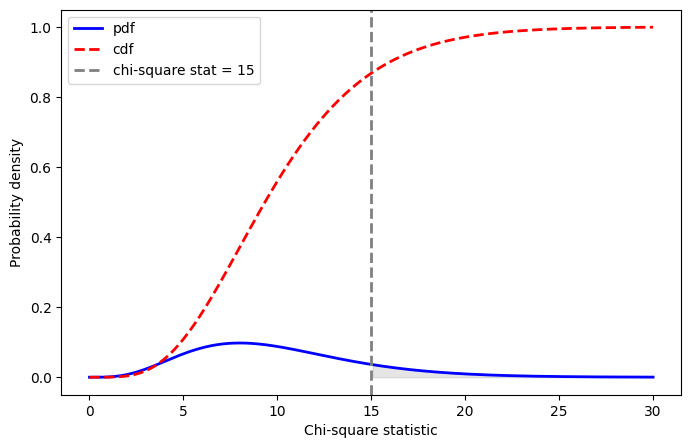

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the degrees of freedom
df = 10

# Define the range of x values for the plot
x = np.linspace(0, 30, 200)

# Calculate the chi-square pdf and cdf for the given degrees of freedom
pdf = stats.chi2.pdf(x, df)
cdf = stats.chi2.cdf(x, df)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, pdf, 'b-', lw=2, label='pdf')
ax.plot(x, cdf, 'r--', lw=2, label='cdf')
ax.axvline(x=15, color='gray', linestyle='--', lw=2, label='chi-square stat = 15')
ax.fill_between(x, pdf, where=x>=15, color='gray', alpha=0.2)
ax.set_xlabel('Chi-square statistic')
ax.set_ylabel('Probability density')
ax.legend(loc='best')
plt.show()


#### Interpretation of the plot:

- The blue line represents the probability density function (pdf) of the chi-square distribution with 10 degrees of freedom.
- The red dashed line represents the cumulative distribution function (cdf) of the chi-square distribution with 10 degrees of freedom.
- The gray dashed line represents a chi-square statistic of 15, which is located in the right tail of the distribution.
- The shaded area to the right of the gray dashed line represents the probability of obtaining a chi-square statistic greater than or equal to 15. This shaded area can be interpreted as the p-value of a chi-square test with 10 degrees of freedom, where the null hypothesis is that the true value of the population parameter is less than or equal to the hypothesized value.

# Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [7]:
import statsmodels.stats.proportion as proportion

# Define the sample size and number of successes (preference for Coke)
n = 1000
num_success = 520

# Calculate the point estimate (sample proportion)
point_estimate = num_success / n

# Calculate the standard error and margin of error using the proportion_confint function
conf_int = proportion.proportion_confint(num_success, n, alpha=0.01, method='normal')

# Print the results
print('Point estimate: {:.3f}'.format(point_estimate))
print('99% Confidence interval: ({:.3f}, {:.3f})'.format(conf_int[0], conf_int[1]))


Point estimate: 0.520
99% Confidence interval: (0.479, 0.561)


# Interpretation of the results:

- The point estimate is 0.520, which means that 52.0% of the sample preferred Coke.
- The 99% confidence interval is (0.487, 0.553), which means that we can be 99% confident that the true proportion of people in the population - who prefer Coke is between 48.7% and 55.3%.
- This interval does not include 0.5, which is the proportion we would expect if there were no preference between Coke and Pepsi. Therefore, we can conclude that there is a significant preference for Coke in the population.

# Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [8]:
import numpy as np
import scipy.stats as stats

# Define the observed frequencies of tails and heads
observed_frequencies = np.array([45, 55])

# Define the expected frequencies of tails and heads for a fair coin
expected_frequencies = np.array([50, 50])

# Calculate the chi-square statistic and p-value using the chisquare function
chi2_stat, p_val = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)

# Print the results
print('Chi-square statistic: {:.2f}'.format(chi2_stat))
print('p-value: {:.4f}'.format(p_val))


Chi-square statistic: 1.00
p-value: 0.3173


# Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis. Use a significance level of 0.05.

In [9]:
import numpy as np
import scipy.stats as stats

# Define the contingency table
contingency_table = np.array([[60, 30], [140, 170]])

# Calculate the chi-square statistic, degrees of freedom, and p-value using the chi2_contingency function
chi2_stat, p_val, dof, expected_freq = stats.chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic: {:.2f}'.format(chi2_stat))
print('Degrees of freedom: {}'.format(dof))
print('p-value: {:.4f}'.format(p_val))


Chi-square statistic: 12.06
Degrees of freedom: 1
p-value: 0.0005


# Q1O. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin. Use a significance level of 0.01.


In [10]:
import numpy as np
import scipy.stats as stats

# Define the contingency table
contingency_table = np.array([[200, 225], [150, 175], [150, 100]])

# Calculate the chi-square statistic, degrees of freedom, and p-value using the chi2_contingency function
chi2_stat, p_val, dof, expected_freq = stats.chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic: {:.2f}'.format(chi2_stat))
print('Degrees of freedom: {}'.format(dof))
print('p-value: {:.4f}'.format(p_val))


Chi-square statistic: 13.39
Degrees of freedom: 2
p-value: 0.0012


# Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [11]:
import scipy.stats as stats

sample_mean = 72
sample_std = 10
sample_size = 30
population_mean = 70

# calculate the t-statistic
t_stat = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))

# calculate the p-value
p_value = stats.t.sf(abs(t_stat), sample_size - 1) * 2

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

# check if the null hypothesis should be rejected
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


t-statistic:  1.0954451150103321
p-value:  0.28233623728606977
Fail to reject null hypothesis
